Given some info about an a desired route, can we predict the airfare of the route?

In [ ]:
!wget https://raw.githubusercontent.com/Speeb04/SDSS-Datathon/refs/heads/main/Resources/Cases/Airline%20Tickets/final_output_data.csv

In [2]:
import matplotlib.pyplot as plt # For plotting
import numpy as np              # Linear algebra library
import pandas as pd             # For manipulating tabular data
import sklearn

Read in the CV and display the data

In [3]:
data = pd.read_csv("final_output_data.csv.6")
data.describe()

,Year,quarter,citymarketid_1,citymarketid_2,nsmiles,large_ms,lf_ms,TotalFaredPax_city1,TotalPerLFMkts_city1,TotalPerPrem_city1,...,city1_gdp_2014,city2_gdp_2014,city1_gdp_2015,city2_gdp_2015,city1_gdp_2016,city2_gdp_2016,city1_gdp_2017,city2_gdp_2017,city1_gdp_2018,city2_gdp_2018
count,14004.000000,14004.000000,14004.000000,14004.000000,14004.000000,14004.000000,14004.000000,1.399700e+04,13997.000000,13997.000000,...,1.384400e+04,1.396300e+04,1.384400e+04,1.396300e+04,1.384400e+04,1.396300e+04,1.384400e+04,1.396300e+04,1.400400e+04,1.400400e+04
mean,2023.285633,2.357112,31506.638889,32300.714296,1061.839617,0.566322,0.327737,3.220308e+06,0.836383,-0.007360,...,2.572814e+08,2.598469e+08,2.664354e+08,2.683597e+08,2.712902e+08,2.738740e+08,2.783004e+08,2.813870e+08,2.829070e+08,2.893308e+08
std,1.030128,1.108776,1214.185463,1421.194815,589.956663,0.174240,0.228027,2.319576e+06,0.141082,0.108333,...,2.810829e+08,3.095763e+08,2.884793e+08,3.167918e+08,2.925929e+08,3.218508e+08,2.992225e+08,3.292014e+08,3.052658e+08,3.356226e+08
min,2022.000000,1.000000,30135.000000,30189.000000,129.000000,0.209700,0.010000,2.993000e+04,0.000000,-0.619400,...,4.038099e+06,4.038099e+06,4.252418e+06,4.252418e+06,4.409773e+06,4.409773e+06,4.518513e+06,4.518513e+06,1.592100e+04,2.257100e+04
25%,2022.000000,1.000000,30529.000000,30852.000000,604.000000,0.431800,0.154500,1.224800e+06,0.793600,-0.051600,...,8.721056e+07,8.585064e+07,8.926822e+07,8.734042e+07,8.920767e+07,8.684465e+07,9.047370e+07,8.780125e+07,8.977556e+07,8.977556e+07
50%,2023.000000,2.000000,31057.000000,32211.000000,936.000000,0.541600,0.265550,2.873210e+06,0.865900,-0.003200,...,1.304346e+08,1.296458e+08,1.368790e+08,1.324822e+08,1.390871e+08,1.379909e+08,1.438360e+08,1.436806e+08,1.468139e+08,1.500331e+08
75%,2024.000000,3.000000,32244.000000,33342.000000,1404.000000,0.676725,0.444300,4.254110e+06,0.922500,0.048400,...,3.657951e+08,3.738171e+08,3.812879e+08,3.835594e+08,3.890809e+08,3.893891e+08,3.993607e+08,3.887911e+08,4.128558e+08,3.986744e+08
max,2025.000000,4.000000,35412.000000,35628.000000,2724.000000,1.000000,1.000000,8.840080e+06,1.000000,0.965900,...,1.432602e+09,1.432602e+09,1.458929e+09,1.458929e+09,1.480027e+09,1.480027e+09,1.508145e+09,1.508145e+09,1.532202e+09,1.532202e+09


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import numpy as np

# Display data head and columns to confirm target variable and features
print("Data Head:")
display(data.head())
print("\nData Columns:")
print(data.columns)

Data Head:


,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,nsmiles,passengers,fare,carrier_lg,...,city1_pop_2021,city2_pop_2021,city1_pop_2022,city2_pop_2022,city1_pop_2023,city2_pop_2023,city1_pop_2024,city2_pop_2024,city1_gdppc,city2_gdppc
0,2025,2,32467,31703,"Miami, FL","New York City, NY",1118,"17,955",$208.52,B6,...,"441,630","8,453,772","456,736","8,356,179","470,677","8,390,888","487,014","8,478,072",646.8626159,180.7253143
1,2025,2,32575,32457,"Los Angeles, CA","San Francisco, CA",372,"17,310",$157.68,WN,...,"3,830,987","815,498","3,832,998","814,176","3,847,428","819,151","3,878,704","827,526",242.6233381,600.8214823
2,2025,2,32575,31703,"Los Angeles, CA","New York City, NY",2510,"13,648",$430.38,DL,...,"3,830,987","8,453,772","3,832,998","8,356,179","3,847,428","8,390,888","3,878,704","8,478,072",242.6233381,180.7253143
3,2025,2,31703,31454,"New York City, NY","Orlando, FL",989,"12,627",$186.50,B6,...,"8,453,772","309,928","8,356,179","318,821","8,390,888","327,390","8,478,072","334,854",180.7253143,370.8302185
4,2025,2,30977,31703,"Chicago, IL","New York City, NY",773,"11,284",$221.33,UA,...,"2,706,324","8,453,772","2,684,076","8,356,179","2,699,144","8,390,888","2,721,308","8,478,072",224.7416051,180.7253143



Data Columns:
Index(['Year', 'quarter', 'citymarketid_1', 'citymarketid_2', 'city1', 'city2',
       'nsmiles', 'passengers', 'fare', 'carrier_lg', 'large_ms', 'fare_lg',
       'carrier_low', 'lf_ms', 'fare_low', 'TotalFaredPax_city1',
       'TotalPerLFMkts_city1', 'TotalPerPrem_city1', 'TotalFaredPax_city2',
       'TotalPerLFMkts_city2', 'TotalPerPrem_city2', 'city1_is_hub',
       'city2_is_hub', 'carrier_lg_is_full_service', 'carrier_low_is_low_cost',
       'city1_gdp_2001', 'city2_gdp_2001', 'city1_gdp_2002', 'city2_gdp_2002',
       'city1_gdp_2003', 'city2_gdp_2003', 'city1_gdp_2004', 'city2_gdp_2004',
       'city1_gdp_2005', 'city2_gdp_2005', 'city1_gdp_2006', 'city2_gdp_2006',
       'city1_gdp_2007', 'city2_gdp_2007', 'city1_gdp_2008', 'city2_gdp_2008',
       'city1_gdp_2009', 'city2_gdp_2009', 'city1_gdp_2010', 'city2_gdp_2010',
       'city1_gdp_2011', 'city2_gdp_2011', 'city1_gdp_2012', 'city2_gdp_2012',
       'city1_gdp_2013', 'city2_gdp_2013', 'city1_gdp_2014', 'c

From the column names and description, `TotalPerLFMkts_city1` is chosen as the target variable representing the fare price. The features are selected based on your description and available columns. Categorical features like `Year`, `quarter`, `citymarketid_1`, and `citymarketid_2` will be one-hot encoded.

Numerical Columns: ['nsmiles', 'passengers', 'large_ms', 'lf_ms', 'fare', 'fare_lg', 'fare_low', 'TotalFaredPax_city1', 'TotalPerLFMkts_city1', 'TotalPerPrem_city1', 'TotalFaredPax_city2', 'TotalPerLFMkts_city2', 'TotalPerPrem_city2', 'city1_gdp_2018', 'city2_gdp_2018', 'city1_pop_2024', 'city2_pop_2024', 'city1_gdppc', 'city2_gdppc']


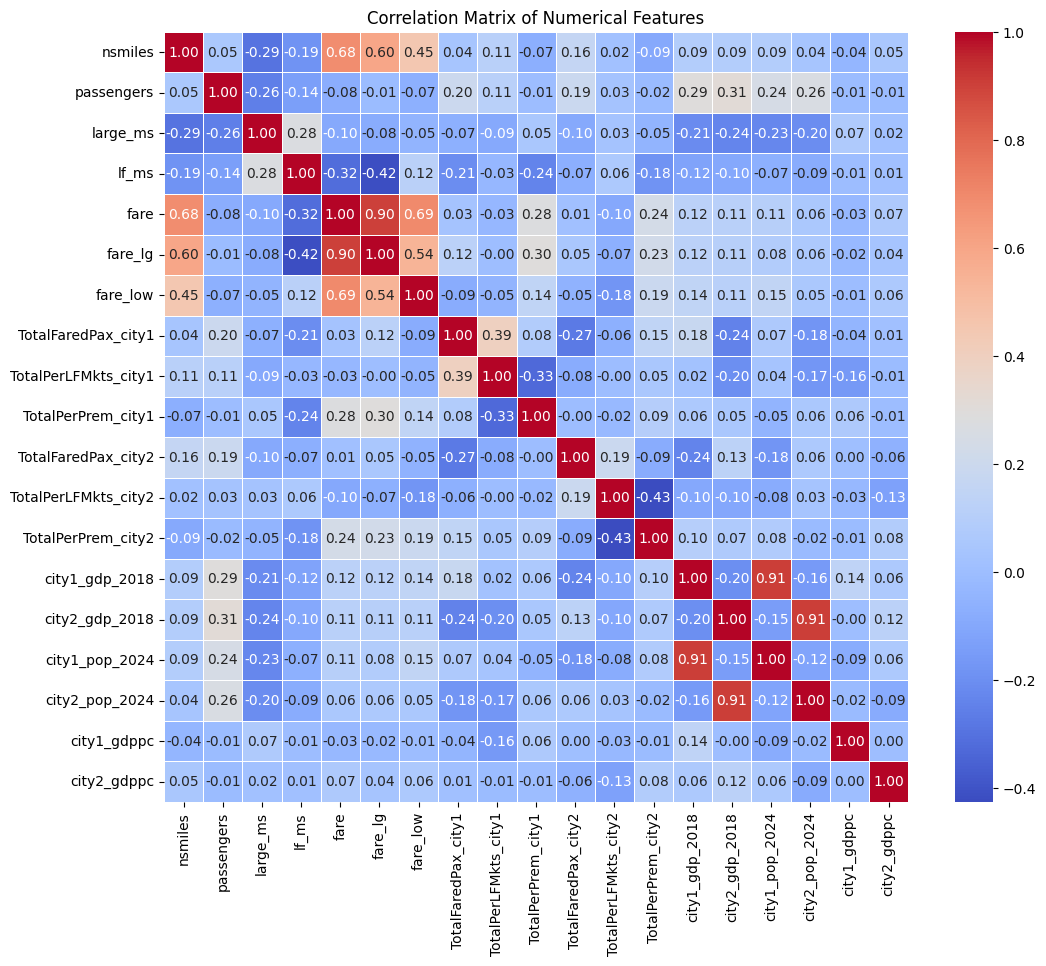

In [5]:
df = data.copy() # Use .copy() to avoid SettingWithCopyWarning
# Re-apply necessary initial cleaning steps, *before* one-hot encoding city1/city2
# 1. Drop columns with 100% missing values
missing_values_count = df.isnull().sum()
missing_values_percentage = (df.isnull().sum() / len(df)) * 100
missing_info = pd.DataFrame({
    'Missing Count': missing_values_count,
    'Missing Percentage': missing_values_percentage
})
columns_to_drop = missing_info[missing_info['Missing Percentage'] == 100].index.tolist()
df = df.drop(columns=columns_to_drop)


numerical_cols = [
    'nsmiles', 'passengers', 'large_ms', 'lf_ms',
    'fare', 'fare_lg', 'fare_low',
    'TotalFaredPax_city1', 'TotalPerLFMkts_city1', 'TotalPerPrem_city1',
    'TotalFaredPax_city2', 'TotalPerLFMkts_city2', 'TotalPerPrem_city2',
    'city1_gdp_2018', 'city2_gdp_2018', 'city1_pop_2024', 'city2_pop_2024', 'city1_gdppc', 'city2_gdppc'
]

# Standardize cleaning for all potential numerical columns
for col in numerical_cols:
    if col in df.columns:
        # Convert to string, replace problematic characters and '#DIV/0!', then convert to numeric
        df[col] = df[col].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)
        df[col] = df[col].replace({'#DIV/0!': np.nan, 'nan': np.nan, 'None':np.nan})
        df[col] = pd.to_numeric(df[col], errors='coerce')


# Drop rows with NaN values in specified population columns
population_cols_to_check = ['city1_pop_2024', 'city2_pop_2024']
df.dropna(subset=[col for col in population_cols_to_check if col in df.columns], inplace=True)

# Impute any remaining NaNs after conversions for other numerical columns
for col in numerical_cols:
    if col not in population_cols_to_check and df[col].isnull().any():
        median_value = df[col].median()
        df[col] = df[col].fillna(median_value)

# Convert passengers to int after cleaning and imputation
df['passengers'] = df['passengers'].astype(int)

import seaborn as sns
print("Numerical Columns:", numerical_cols)
plt.figure(figsize=(12, 10))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Now, create the 'route' column
df['route'] = df.apply(lambda row: '-'.join(sorted([row['city1'], row['city2']])), axis=1)

# Calculate the frequency of each route
route_counts = df['route'].value_counts()

In [6]:
df['passengers']

,passengers
0,17955
1,17310
2,13648
3,12627
4,11284
...,...
13999,163
14000,163
14001,163
14002,163


In [7]:
y = df['fare']
X = df.drop(columns=['fare', 'fare_lg', 'fare_low', 'citymarketid_1',
                     'citymarketid_2'])

X = X[['nsmiles', 'passengers', 'large_ms', 'lf_ms', 'Year', 'quarter','city1', 'city2', 'carrier_lg', 'carrier_low',
      'city1_gdp_2018', 'city2_gdp_2018', 'city1_pop_2024', 'city2_pop_2024', 'city1_gdppc', 'city2_gdppc',
      'route']]
X = pd.get_dummies(X, columns=['nsmiles', 'passengers', 'large_ms', 'lf_ms', 'Year', 'quarter','city1', 'city2', 'carrier_lg', 'carrier_low',
      'city1_gdp_2018', 'city2_gdp_2018', 'city1_pop_2024', 'city2_pop_2024', 'city1_gdppc', 'city2_gdppc',
      'route'], drop_first=True, dtype=int)

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("First 5 rows of X:\n", X.head())
print("First 5 values of y:\n", y.head())

# # Convert categorical features to one-hot encoding
# X = pd.get_dummies(X, columns=['Year', 'quarter', 'citymarketid_1', 'citymarketid_2'], drop_first=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")




Shape of X: (13918, 17659)
Shape of y: (13918,)
First 5 rows of X:
    nsmiles_148  nsmiles_177  nsmiles_190  nsmiles_192  nsmiles_204  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   nsmiles_209  nsmiles_210  nsmiles_214  nsmiles_222  nsmiles_224  ...  \
0            0            0            0            0            0  ...   
1            0            0            0            0            0  ...   
2            0            0            0            0            0  ...   
3            0            0            0            0            0  ...   
4            0            0            0            0            0  ...   

   route_Seattle, WA-Washington, DC  route_St. Louis, MO-Tam

Now, let's train a Linear Regression model using the processed data.

In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# Initialize and train the Linear Regression model
# model = DecisionTreeRegressor(criterion="squared_error", max_depth=60)
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
train_r2 = r2_score(y_train, model.predict(X_train))

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R2): {r2:.4f}")
print(f"Training R-squared: {train_r2:.4f}")
# plt.figure(figsize=(20, 10))
# plot_tree(model, feature_names=X.columns, filled=True, rounded=True, max_depth = 2)
# plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Perfect prediction line
plt.xlabel('Actual Fare')
plt.ylabel('Predicted Fare')
plt.title('Actual vs. Predicted Fare Prices (Excluding fare_lg and fare_low)')
plt.grid(True)
plt.show()

We additionally want city attributes such as whether the city is a hub for full service airlines, the GDP of the city, population of the city, GDP p/c, etc.

For flights, we would also like to know which month of the year the flight occured.

Features:
Past fares for the route (continuous)

Quarter of the year (1-hot)

Distance (continuous)

Passenger count for the route (discrete)

Airline market share (continuous)

For each origin and destination:

City name (1-hot)

Is the city an air hub? (T/F)

GDP of the city (discrete)

Population (discrete)

GDP per capita (discrete)


In [ ]:
from sklearn.linear_model import LinearRegression
# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

print("Linear Regression model trained successfully.")


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"\nModel Evaluation (after excluding fare_lg and fare_low):\n")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Perfect prediction line
plt.xlabel('Actual Fare')
plt.ylabel('Predicted Fare')
plt.title('Actual vs. Predicted Fare Prices (Excluding fare_lg and fare_low)')
plt.grid(True)
plt.show()

In [ ]:
print(f"Intercept: {model.intercept_:.2f}")
print("Coefficients (first 10, for brevity):\n", model.coef_[:10])

# You can also get the coefficients mapped to their feature names
# for a more readable output. Note: X.columns contains all feature names.
coefficients_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print("\nAll Coefficients:\n")
display(coefficients_df.iloc[:20])

In [ ]:
display(coefficients_df.iloc[-20:])


Now, we get rid of the total covariates, and that is hindsight statistics.

In [ ]:
X = X.drop